In [27]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 812 kB/s 


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from dtreeviz.trees import dtreeviz

In [80]:
df_ol = pd.read_csv("https://raw.githubusercontent.com/vn322/Sport-University/main/athletes.csv")
df_ufc = pd.read_csv("https://raw.githubusercontent.com/vn322/Sport-University/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F%20UFCdata%20-%20preprocessed_data.csv")

In [83]:
df_ufc

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,Red,False,1,0,1,0,1.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
3588,Red,False,1,0,1,0,0.000000,0.000000,1.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
3589,Red,True,1,0,2,0,0.500000,0.500000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
3590,Red,False,1,0,1,0,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0


In [81]:
df_ol['sport'].unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [82]:
df_ol[df_ol['sport'] == 'judo']

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
39,388896171,Abderrahmane Benamadi,ALG,male,7/3/85,1.83,90.0,judo,0,0,0
58,803368584,Abdullo Tangriev,UZB,male,3/28/81,1.90,132.0,judo,0,0,0
65,221052317,Abigel Joo,HUN,female,8/6/90,1.83,76.0,judo,0,0,0
83,970243540,Adam Okruashvili,GEO,male,1/1/89,1.89,130.0,judo,0,0,0
122,557196811,Adrian Gomboc,SLO,male,1/20/95,1.70,69.0,judo,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11438,586642596,Zack Piontek,RSA,male,1/27/91,1.81,90.0,judo,0,0,0
11464,853131625,Zeyad Mater,YEM,male,12/18/91,1.74,73.0,judo,0,0,0
11469,943438686,Zhansay Smagulov,KAZ,male,9/26/92,1.69,66.0,judo,0,0,0
11474,315308490,Zhehui Zhang,CHN,female,1/17/88,1.77,76.0,judo,0,0,0


In [22]:
df_ufc

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,1,False,1,0,1,0,1.000000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
3588,1,False,1,0,1,0,0.000000,0.000000,1.000000,1.000000,...,0,0,1,0,0,0,0,1,0,0
3589,1,True,1,0,2,0,0.500000,0.500000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
3590,1,False,1,0,1,0,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0


In [20]:
df_ufc.columns[:20]

Index(['Winner', 'title_bout', 'no_of_rounds', 'B_current_lose_streak',
       'B_current_win_streak', 'B_draw', 'B_avg_BODY_att', 'B_avg_BODY_landed',
       'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att',
       'B_avg_DISTANCE_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed',
       'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_KD', 'B_avg_LEG_att',
       'B_avg_LEG_landed', 'B_avg_PASS'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_ufc['Winner'] = labelencoder.fit_transform(df_ufc['Winner'])

In [23]:
feature_cols = [
       'B_current_win_streak', 'B_avg_BODY_landed',
       'B_avg_DISTANCE_landed',
       'B_avg_HEAD_landed']

X = df_ufc[feature_cols] # Features
y = df_ufc.Winner # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [24]:
clf = DecisionTreeClassifier(max_depth=3, random_state=1234) # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer

y_pred = clf.predict(X_test) #Predict the response for test dataset
accuracy = metrics.accuracy_score(y_test, y_pred) # Evaluate model accuracy
print(f"Model accuracy (initial model): {accuracy:.1%}")

Model accuracy (initial model): 62.8%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


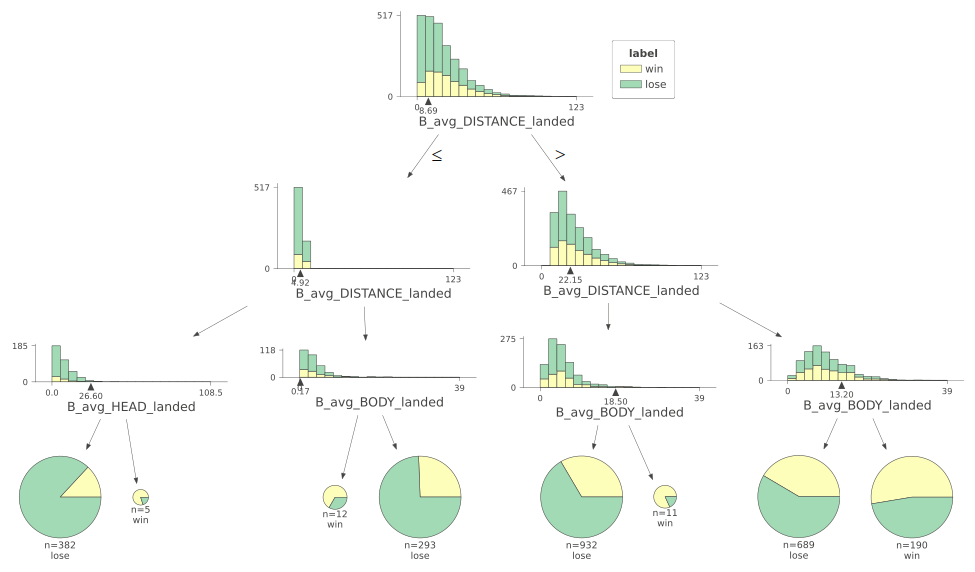

In [36]:
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='label',
               feature_names=X.columns.to_list(), 
               class_names=["win", "lose"],
               scale=1.4)

viz.save("dtreeviz.svg")

viz

In [35]:
X_predict = df_ufc[feature_cols] # Features # print(X_predict)
y_predict = clf.predict(X_predict)
print(y_predict[:7])

[1 1 1 0 0 1 1]


In [46]:
df_ol

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,59,1,10/17/69,1.72,64.0,2,0,0,0
1,532037425,A Lam Shin,102,0,9/23/86,1.68,56.0,9,0,0,0
2,435962603,Aaron Brown,33,1,5/27/92,1.98,79.0,2,0,0,1
3,521041435,Aaron Cook,119,1,1/2/91,1.83,80.0,22,0,0,0
4,33922579,Aaron Gate,141,1,11/26/90,1.81,71.0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,48,0,8/10/95,1.64,58.0,2,0,0,0
11534,214461847,Zuzana Hejnova,50,0,12/19/86,1.73,63.0,2,0,0,0
11535,88361042,di Xiao,38,1,5/14/91,1.85,100.0,27,0,0,0
11536,900065925,le Quoc Toan Tran,202,1,4/5/89,1.60,56.0,26,0,0,0


In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_ol['nationality'] = labelencoder.fit_transform(df_ol['nationality'])
df_ol['sex'] = labelencoder.fit_transform(df_ol['sex'])
df_ol['sport'] = labelencoder.fit_transform(df_ol['sport'])


In [37]:
df_ol.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [55]:
df_ol = df_ol.dropna()

In [61]:
feature_cols = ['nationality', 'sport',  'height', 'weight']

X = df_ol[feature_cols] # Features
y = df_ol.sex # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [72]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234) # Create Decision Tree classifer object
clf = clf.fit(X_train,y_train) # Train Decision Tree Classifer

y_pred = clf.predict(X_test) #Predict the response for test dataset
accuracy = metrics.accuracy_score(y_test, y_pred) # Evaluate model accuracy
print(f"Model accuracy (initial model): {accuracy:.1%}")

Model accuracy (initial model): 77.9%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


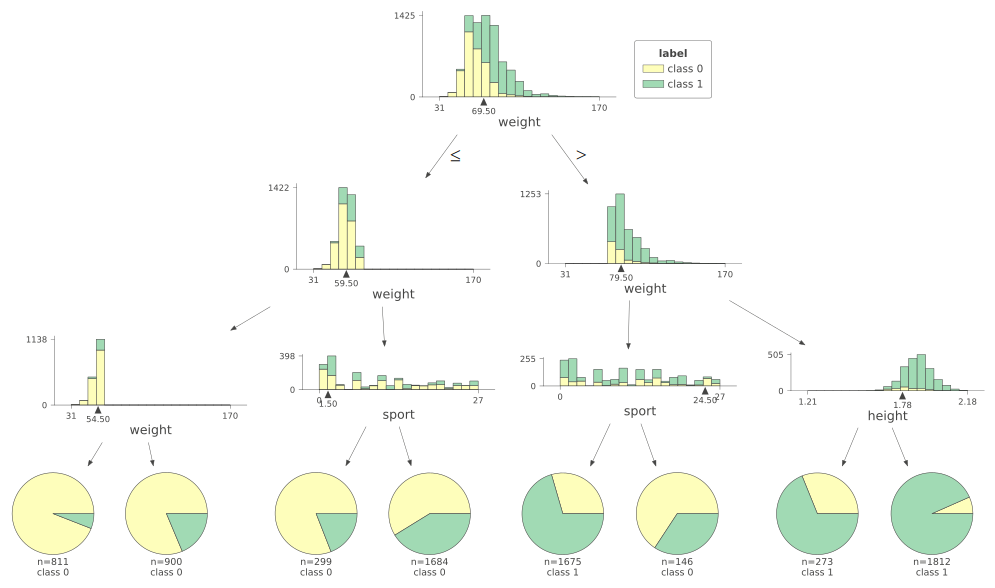

In [86]:
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='label',
               feature_names=X.columns.to_list(), 
               
               scale=1.4)

viz.save("dtreeviz.svg")

viz

In [85]:
clf.score(X_test, y_test)

0.7786985880908532

In [67]:
import pandas as pd
import numpy as np
import graphviz
import pydotplus
import matplotlib.image as mpimg
import io
import random

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, tree, datasets
from dtreeviz.trees import dtreeviz

In [69]:
classifier = tree.DecisionTreeClassifier(class_weight=None, 
                                         criterion='entropy', 
                                         max_depth=3,
                                         max_features='auto', 
                                         splitter='best', 
                                         random_state=24)
model = classifier.fit(X_train, y_train)

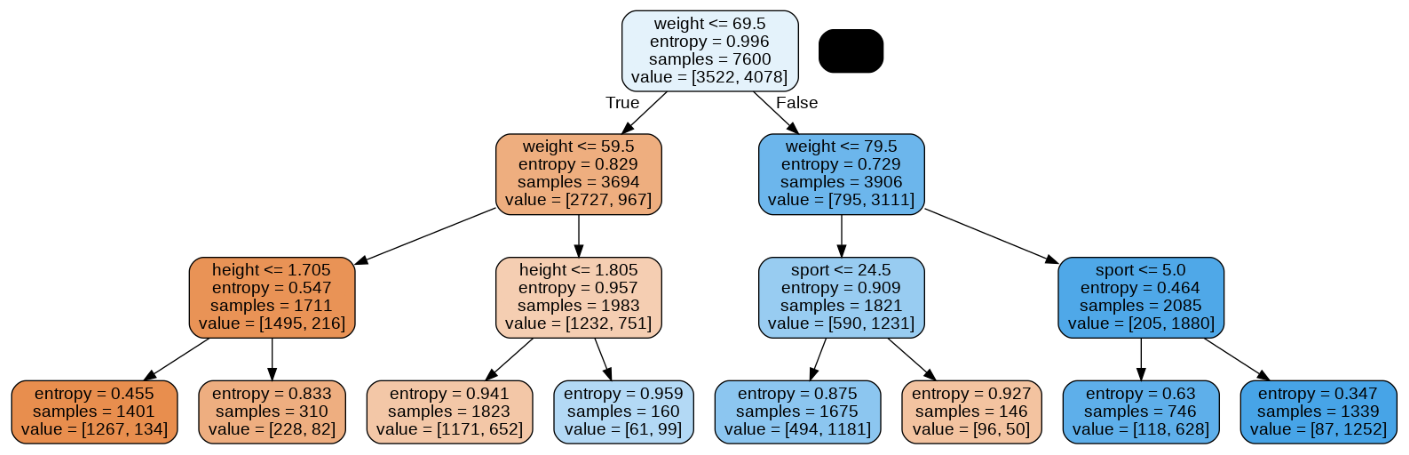

In [74]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data, 
                     feature_names=X.columns.to_list(),  
                     filled=True,
                     #class_names=['red', 'white'],
                     rounded=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(25,10))
plt.box(False)

img = mpimg.imread(filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

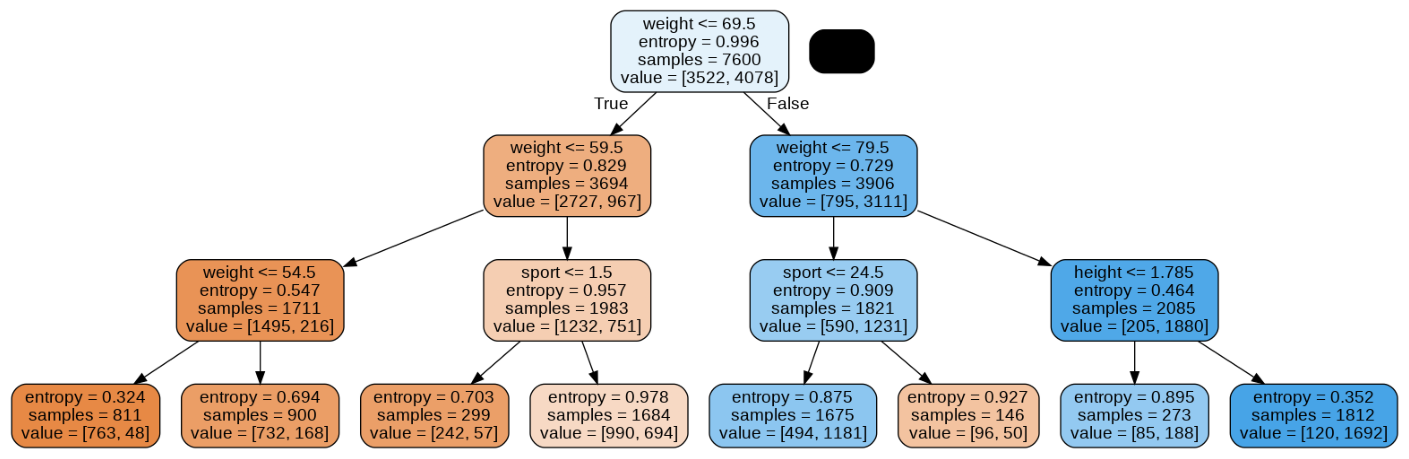

In [84]:
dot_data = io.StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                     feature_names=X.columns.to_list(),  
                     filled=True,
                     #class_names=['red', 'white'],
                     rounded=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(25,10))
plt.box(False)

img = mpimg.imread(filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

In [87]:
text_representation = tree.export_text(clf, feature_names=X.columns.to_list())
print(text_representation)

|--- weight <= 69.50
|   |--- weight <= 59.50
|   |   |--- weight <= 54.50
|   |   |   |--- class: 0
|   |   |--- weight >  54.50
|   |   |   |--- class: 0
|   |--- weight >  59.50
|   |   |--- sport <= 1.50
|   |   |   |--- class: 0
|   |   |--- sport >  1.50
|   |   |   |--- class: 0
|--- weight >  69.50
|   |--- weight <= 79.50
|   |   |--- sport <= 24.50
|   |   |   |--- class: 1
|   |   |--- sport >  24.50
|   |   |   |--- class: 0
|   |--- weight >  79.50
|   |   |--- height <= 1.78
|   |   |   |--- class: 1
|   |   |--- height >  1.78
|   |   |   |--- class: 1



https://telegra.ph/Kak-vizualizirovat-modeli-prichinno-sledstvennyh-svyazej-s-pomoshchyu-intuitivno-ponyatnyh-tablic-uslovnoj-veroyatnosti-10-12

In [2]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 


In [3]:

"""This module contains helpder functions to visualise conditional probability tables
"""
from itertools import product
import pandas as pd
import numpy as np
from IPython.display import display

from pgmpy.factors.discrete import TabularCPD, DiscreteFactor

def __cpt_to_dataframe(tabularcpd : TabularCPD) -> pd.DataFrame:
    """Converts a TabularCPD (pgmpy Conditional Probability Table object) output into a DataFrame
    Args:
        tabularcpd (tabularcpd): The TabularCPD to be converted.
    Returns:
        pd.DataFrame: The output DataFrame
    Notes:
        Modified from _make_table_str in CPD.py (right click on TabularCPD and choose Goto Definition)
    """
    headers_list = []

    # Build column headers
    evidence = tabularcpd.variables[1:]
    evidence_card = tabularcpd.cardinality[1:]
    if evidence:
        col_indexes = np.array(list(product(*[range(i) for i in evidence_card])))
        if tabularcpd.state_names:
            for i in range(len(evidence_card)):
                column_header = [str(evidence[i])] + [
                    "{var}({state})".format(
                        var=evidence[i], state=tabularcpd.state_names[evidence[i]][d]
                    )
                    for d in col_indexes.T[i]
                ]
                headers_list.append(column_header)
        else:
            for i in range(len(evidence_card)):
                column_header = [str(evidence[i])] + [
                    f"{evidence[i]}_{d}" for d in col_indexes.T[i]
                ]
                headers_list.append(column_header)

    # Build row headers
    if tabularcpd.state_names:
        variable_array = [
            [
                "{var}({state})".format(
                    var=tabularcpd.variable, state=tabularcpd.state_names[tabularcpd.variable][i]
                )
                for i in range(tabularcpd.variable_card)
            ]
        ]
    else:
        variable_array = [
            [f"{tabularcpd.variable}_{i}" for i in range(tabularcpd.variable_card)]
        ]
    # Stack with data
    labeled_rows = np.hstack(
        (np.array(variable_array).T, tabularcpd.get_values())
    ).tolist()

    # If there is no headers list (because there is only one variable) then create one ready for the DataFrame conversion
    if headers_list == []:
        headers_list = [[tabularcpd.variables[0], "P"]]

    # Convert the data and headers arrays into a DataFrame
    df_cpd = pd.DataFrame(data=labeled_rows, columns=headers_list)

    # If there is only one variable this is a "header node" i.e. one with no inputs / parents so the default format provided looks best
    # If there are multiple variables i.e. a node with one or more inputs / parents then transposing the DataFrame give an output format
    # that closely resembles that proposed by Pearl in "The Book of Why", Chapter 3, p117
    if len(tabularcpd.variables) > 1:
        df_cpd = df_cpd.T
        df_cpd.columns = df_cpd.iloc[0]
        df_cpd = df_cpd.iloc[1: , :]

    df_cpd = df_cpd.apply(pd.to_numeric, errors="ignore")
    return df_cpd

def display_cpt(tabularcpd : TabularCPD) -> pd.DataFrame:
    """Displays a CPD to a Jupyter cell output including a formatted explanation and a DataFram of the probabilities
    Args:
        tabularcpd (tabularcpd): The TabularCPD to be displayed.
    Returns:
        pd.DataFrame: The conditional probability table formatted as a DataFrame
    """
    description = f"Probability of {tabularcpd.variables[0]}"
    if len(tabularcpd.variables) > 1:
        description = description + f" given {', '.join(tabularcpd.variables[1:])}"

    df_cpd = __cpt_to_dataframe(tabularcpd)

    print(description)
    display(df_cpd)

    return df_cpd

def display_query(query : DiscreteFactor, phi_or_p : str = "phi", print_state_names : bool = True) -> pd.DataFrame:
    """Converts a DiscreteFactor (a pgmpy query object) output into a DataFrame
    Args:
        phi_or_p (str, optional): 'phi': When used for Factors. 'p': When used for CPDs. Defaults to "phi".
        print_state_names (bool, optional): If True, the user defined state names are displayed.. Defaults to True.
    Returns:
        pd.DataFrame: The output DataFrame
    Notes:
        Modified from _str in DiscreteFactor.py (right click on TabularCPD and choose Goto Definition)
    """
    string_header = list(map(str, query.scope()))
    string_header.append(f"{phi_or_p}({','.join(string_header)})")

    value_index = 0
    factor_table = []
    for prob in product(*[range(card) for card in query.cardinality]):
        if query.state_names and print_state_names:
            prob_list = [
                "{var}({state})".format(
                    var=list(query.variables)[i],
                    state=query.state_names[list(query.variables)[i]][prob[i]],
                )
                for i in range(len(query.variables))
            ]
        else:
            prob_list = [
                f"{list(query.variables)[i]}_{prob[i]}"
                for i in range(len(query.variables))
            ]

        prob_list.append(query.values.ravel()[value_index])
        factor_table.append(prob_list)
        value_index += 1

    return pd.DataFrame(factor_table, columns=string_header)
